# Метрики качества бинарной классификации

## Теоретическая часть

__Вспомнить из лекций:__
* Как вычисляются следующие метрики качества: **точность, полнота, F-мера, LogLoss, AUC-ROC, AUC-RPC**?

Большинство алгоритмов бинарной классификации работают следующим образом: они предсказывают для объекта  $x$ вещественное число $b(x)$, а затем сравнивают его с порогом $T$: 
- если $b(x) < T$, то предсказывается класс -1, 
- иначе предсказывается класс +1. 

Это можно записать в терминах функции **sign** (знак):
$$a(x) = sign(b(x)-T)$$

Метрики качества бинарной классификации можно разделить на две группы: 

оценивают 
- бинарные предсказания $a(x)$ (класс -1 и +1), 
- вещественные предсказания $b(x)$. 

Некоторые метрики последней группы варьируют порог, и оценивают качество бинарных предсказаний при различных порогах. Это полезно, чтобы "отделить" качество работы алгоритма от качества выбора конкретного порога. 

### Вопрос: 
какие из рассмотренных в лекциях метрик относятся к каждой группе?


### Ответ:
* Бинарные: точность, полнота, F-мера
* Вещественные: LogLoss, AUC-ROC, AUC-RPC

### Задача 1
Вычислить (вручную) **accuracy, точность, полноту** и  **F-меру** для следующих векторов предсказаний и правильных ответов:

|                    -          |  1 | 2  | 3  | 4  |  5 | 6  | 7  |
|-------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных)  | +1 | -1 | +1 | +1 | -1 | +1 | -1 |
| Предсказание                  | -1 | +1 | +1 | +1 | -1 | -1 | -1 |



### Решение:
*TP* = 2

*FP* = 1

*TN* = 2

*FN* = 2

*accuracy* = (TP + TN)/(TP + TN + FP + FN) = 0.571

*precision* = TP / ( TP + FP ) = 0.666

*recall* = TP / ( TP + FN ) = 0.5

*F-score* = (2 * *precision* * *recall*) / (*precision* + *recall*) = 0.568

### Задача 2
Рассмотрим алгоритм вида $$a(x) = sign(b(x)-T).$$ Пусть для любого объекта $x$ выполнено $-10 < b(x) < 10$. Какова будет точность и полнота алгоритма, если положить $T=-15$? $T=15$? 


### Решение:
1. T = - 15 => b(x) > T =>

    $$a(x) = sign(b(x)-T) = 1$$ =>

    TN = 0, FN = 0, FP = ? =>

    *precision* = TP / (TP + FP) = ?

    *recall* = TP / (TP + FN) = TP/TP = 1
2.  T = 15 => b(x) < T =>

    $$a(x) = sign(b(x)-T) = -1$$ =>

    TP = 0 =>

    *precision* = TP / (TP + FP) = 0

    *recall* = TP / (TP + FN) = 0

### Задача 3

Найти (вручную) точки, необходимые для пострения ROC-кривой для следующих векторов предсказаний и правильных ответов:

|                  _            | 1   | 2    |  3  |  4  |  5  |  6  |  7  |
|------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | -1 | +1 | +1 | -1 | +1 | -1 | -1 |
| Предсказание $b(x)$       | 1  | 15 | -1 | 7  | 3  | -8 | -5 |

__Указание:__

Следует сначала отсортировать объекты по возрастанию вещественных предсказаний $b(x)$. 

### Решение:

FPR (ось абцисс) = FP / (FP + TN)

TPR (ось ординат) = TP / (TP + FN)

|              _        | 1   |   2 |   3 |   4 |   5  | 6  | 7  |
|:--- |:----:|:----:|:----:| :----:|:----:|:----:|---:|
| Правильный ответ (из данных) | -1 | -1 | +1 | -1 | +1 | -1 | +1 |
| Предсказание $b(x)$          | -8  | -5 | -1 | 1 | 3  |  7 | 15 |

1. t = 16

|              _        | 1   |   2 |   3 |   4 |   5  | 6  | 7  |
|:--- |:----:|:----:|:----:| :----:|:----:|:----:|---:|
| Правильный ответ (из данных) | -1 | -1 | +1 | -1 | +1 | -1 | +1 |
| Предсказание $b(x)$          | -8  | -5 | -1 | 1 | 3  |  7 | 15 |
| a(x)                         | -1 | -1 | -1 | -1 | -1 | -1 | -1 |

|  TP | FP   |   TN |   FN |
|:--- |:----:|:----:|:----:|
| 0 | 0 | 4 | 3 |

FPR = 0, TPR = 0 => **(0, 0)**

2. t = 6

|              _        | 1   |   2 |   3 |   4 |   5  | 6  | 7  |
|:--- |:----:|:----:|:----:| :----:|:----:|:----:|---:|
| Правильный ответ (из данных) | -1 | -1 | +1 | -1 | +1 | -1 | +1 |
| Предсказание $b(x)$          | -8  | -5 | -1 | 1 | 3  |  7 | 15 |
| a(x)                         | -1 | -1 | -1 | -1 | -1 | +1 | +1 |

|  TP | FP   |   TN |   FN |
|:--- |:----:|:----:|:----:|
| 1 | 1 | 3 | 2 |

FPR = 1/(1 + 3) = 0.25, TPR = 1/(1 + 2) = 0.33 => **(0.25, 0.33)**

3. t = 2

|              _        | 1   |   2 |   3 |   4 |   5  | 6  | 7  |
|:--- |:----:|:----:|:----:| :----:|:----:|:----:|---:|
| Правильный ответ (из данных) | -1 | -1 | +1 | -1 | +1 | -1 | +1 |
| Предсказание $b(x)$          | -8  | -5 | -1 | 1 | 3  |  7 | 15 |
| a(x)                         | -1 | -1 | -1 | -1 | +1 | +1 | +1 |

|  TP | FP   |   TN |   FN |
|:--- |:----:|:----:|:----:|
| 2 | 1 | 3 | 1 |

FPR = 1 / (1 + 3) = 0.25, TPR = 2 / (2 + 1) = 0. 66 => **(0.25, 0.66)**

4. t = -3

|              _        | 1   |   2 |   3 |   4 |   5  | 6  | 7  |
|:--- |:----:|:----:|:----:| :----:|:----:|:----:|---:|
| Правильный ответ (из данных) | -1 | -1 | +1 | -1 | +1 | -1 | +1 |
| Предсказание $b(x)$          | -8  | -5 | -1 | 1 | 3  |  7 | 15 |
| a(x)                         | -1 | -1 | +1 | +1 | +1 | +1 | +1 |

|  TP | FP   |   TN |   FN |
|:--- |:----:|:----:|:----:|
| 3 | 2 | 2 | 0 |

FPR = 2 / (2 + 2) = 0.5, TPR = 3 / (3 + 0) = 1 => **(0.5, 1)**

5. t = -9

|              _        | 1   |   2 |   3 |   4 |   5  | 6  | 7  |
|:--- |:----:|:----:|:----:| :----:|:----:|:----:|---:|
| Правильный ответ (из данных) | -1 | -1 | +1 | -1 | +1 | -1 | +1 |
| Предсказание $b(x)$          | -8  | -5 | -1 | 1 | 3  |  7 | 15 |
| a(x)                         | +1 | +1 | +1 | +1 | +1 | +1 | +1 |

|  TP | FP   |   TN |   FN |
|:--- |:----:|:----:|:----:|
| 3 | 4 | 0 | 0 |

FPR = 4 / (4 + 0) = 1, TPR = 3 / (3 + 0) = 1 => **(1, 1)**

### Задача 4

Какое значение AUC-ROC будет у алгоритма $b(x)$, который на каждом объекте возвращает случайное вещественное число из отрезка [-2, 2] (равномерное распределение)? 

У алгоритма, который для всех объектов класса -1 возвращает отрицательное число, а для всех объектов класса +1 - положительное число?


### Решение:
1. AUC-ROC = 0.5, т.к. дает случайные ответы
2. AUC-ROC = 1, т.к. идеальный классификатор (нет ложных предсказаний)

### Задача 5

Пусть для алгоритма $b(x)$ значение AUC-ROC равно 0.2. Каким будет AUC-ROC алгоритма $-b(x)$?


### Решение:
a1(x) при b(x)

a2(x) при -b(x)

AUC-ROC(a1(x)) =>

точки (FPR(a1(x)), TPR(a1(x))) =>

AUC-ROC(a2(x)) =>

точки (TPR(a1(x)), FPR(a1(x))) =>

AUC-ROC(a2(x)) = 1 - AUC-ROC(a1(x)) = 1 - 0.2 = **0.8**

## Практическая часть

Функции для вычисления метрик в **sklearn** 

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Сгенерируем два бинарных вектора длины 100 (число объектов):

In [35]:
import numpy as np

In [36]:
n = 100
y_true = np.random.randint(2, size=n)
y_pred = np.random.randint(2, size=n)

Вычислим метрики качества бинарных предсказаний для случайных ответов (соответствует алгоритму, не выделяющему никаких закономерностей в данных):

In [37]:
precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)

(0.45098039215686275, 0.5476190476190477, 0.49462365591397855)

In [38]:
accuracy_score(y_true, y_pred)

0.53

Все метрики около 0.5 (примерная доля объектов положительного класса в выборке).

Вычислим метрики для случая, когда все ответы правильные:

In [39]:
precision_score(y_true, y_true), recall_score(y_true, y_true), f1_score(y_true, y_true)

(1.0, 1.0, 1.0)

In [40]:
accuracy_score(y_true, y_true)

1.0

Как и ожидается, все метрики равны 1.

Сгенерируем вектор случайных вещественных предсказаний:

In [41]:
b_pred = np.random.rand(n)

Вычислим roc_auc:

In [42]:
roc_auc_score(y_true, b_pred)

0.48070607553366174

Как и ожидается, значение ROC-AUC около 0.5.

### Задание
Реализовать построение ROC-кривой, используя данные задачи 3.

Сопоставить с результатами, полученными при решении задачи 3.

In [43]:
import matplotlib.pyplot as plt

class ROCDecorator:

    def __init__(self, y, b_f):
        self.y = y
        self.b_f = b_f
        self.fprs = []
        self.tprs = []

    def calculate_metrics(self, ts):
        b_f = self.b_f
        y = self.y
        fprs, tprs  = [], []
        for t in ts:
            y_pred = [(-1 if b < t else 1) for b in b_f]
            tp, fp, tn, fn = 0, 0, 0, 0
            for i in range(len(y_pred)):
                tp += self.__is_tp(y_pred[i], y[i])
                fp += self.__is_fp(y_pred[i], y[i])
                tn += self.__is_tn(y_pred[i], y[i])
                fn += self.__is_fn(y_pred[i], y[i])
            fprs.append(self.__fetch_fpr(fp, tn))
            tprs.append(self.__fetch_tpr(tp, fn))

        self.fprs = fprs
        self.tprs = tprs

    def show_roc_graph(self):
        plt.plot(self.fprs, self.tprs, linestyle="-")
        plt.show()

    def __fetch_fpr(self, fp, tn):
        return fp / (fp + tn)

    def __fetch_tpr(self, tp, fn):
        return tp / (tp + fn)

    def __is_tp(self, a_x, y):
        return a_x == 1 and y == 1

    def __is_fp(self, a_x, y):
        return a_x == 1 and y == -1

    def __is_fn(self, a_x, y):
        return a_x == -1 and y == 1

    def __is_tn(self, a_x, y):
        return a_x == -1 and y == -1

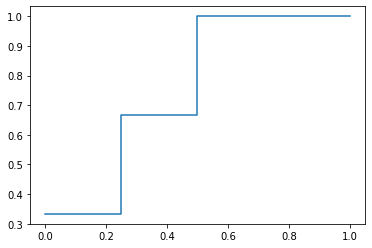

In [44]:
roc_decorator = ROCDecorator(
    y=[-1, -1, 1,-1, 1, -1, 1],
    b_f=[-8, -5, -1, 1, 3, 7, 15]
)

roc_decorator.calculate_metrics(
    ts=range(-9, 16)
)

roc_decorator.show_roc_graph()